In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
list_csv_names_niners =[
    # 'Niners_Pre_Game1_Packers.csv',
    # 'Niners_Pre_Game2_Vikings.csv',
    # 'Niners_Pre_Game3_Texans.csv',
    'Niners_Game1_Bears.csv',
    'Niners_Game2_Seahawks.csv',
    'Niners_Game3_Broncos.csv',
    'Niners_Game4_Rams.csv',
    'Niners_Game5_Panthers.csv',
    'Niners_Game6_Falcons.csv',
    'Niners_Game7_Chiefs.csv',
    'Niners_Game8_Rams.csv',
    'Niners_Game9_Chargers.csv',
    'Niners_Game10_Cardinals.csv',
    'Niners_Game11_Saints.csv'
]
list_csv_names_bears =[
    'Bears_Pre_Game1_Chiefs.csv',
    'Bears_Pre_Game2_Seahawks.csv',
    'Bears_Pre_Game3_Browns.csv',
    'Bears_Game1_Niners.csv',
    'Bears_Game2_Packers.csv',
    'Bears_Game3_Texans.csv',
    'Bears_Game4_Giants.csv',
    'Bears_Game5_Vikings.csv',
    'Bears_Game6_Commanders.csv',
    'Bears_Game7_Patriots.csv',
    'Bears_Game8_Cowboys.csv',
    'Bears_Game9_Dolphins.csv',
    'Bears_Game10_Lions.csv',
    'Bears_Game11_Falcons.csv'
]

In [3]:
import os
paths_niners = [os.path.join('Niners_CSVs', csv_name) for csv_name in list_csv_names_niners]
paths_bears = [os.path.join('Bears_CSVs', csv_name) for csv_name in list_csv_names_bears]

In [4]:
list_niners_dfs = [pd.read_csv(path) for path in paths_niners]

In [5]:
for df in list_niners_dfs:
    df['Date'] = pd.to_datetime(df['Date'])

In [6]:
mega_niners_df = pd.concat(list_niners_dfs)

In [7]:
list_bears_dfs = [pd.read_csv(path) for path in paths_bears]

In [8]:
for df in list_bears_dfs:
    df['Date'] = pd.to_datetime(df['Date'])

In [9]:
mega_bears_df = pd.concat(list_bears_dfs)

# Numerical EDA

### Niners EDA

In [10]:
for i, df in enumerate(list_niners_dfs):
    number_unique_users = df['User'].nunique()
    number_unique_tweets = df['ID'].nunique()
    print(f"number of unique users in dataframe {i}: {number_unique_users}, number of unique tweets: {number_unique_tweets}")

number of unique users in dataframe 0: 544, number of unique tweets: 915
number of unique users in dataframe 1: 531, number of unique tweets: 852
number of unique users in dataframe 2: 527, number of unique tweets: 899
number of unique users in dataframe 3: 595, number of unique tweets: 941
number of unique users in dataframe 4: 349, number of unique tweets: 590
number of unique users in dataframe 5: 371, number of unique tweets: 583
number of unique users in dataframe 6: 459, number of unique tweets: 807
number of unique users in dataframe 7: 442, number of unique tweets: 738
number of unique users in dataframe 8: 454, number of unique tweets: 739
number of unique users in dataframe 9: 440, number of unique tweets: 714
number of unique users in dataframe 10: 337, number of unique tweets: 608


In [11]:
for df in list_niners_dfs:
    print(df.groupby(['User']).size().sort_values(ascending=False).head(10))
    print(df.shape[0], '\n')

User
49ersSupporters    192
DelMarDennis        12
akaDafni            10
kareemslick          8
Andy_Beebe           6
FraserKnowsBest      6
NinerMMA             6
ReginaldJ            5
Yolanda49er          5
WolfmanWit           5
dtype: int64
915 

User
49ersSupporters    159
kareemslick         15
49ersSportsTalk     10
DAT_HENNY_CHICK      9
SaigonHankMoody      6
Rod_cali247          6
akaDafni             5
viznix               5
sfskp                5
NyteRyda_2           4
dtype: int64
852 

User
49ersSupporters    153
Chris01158505       15
CJ061383            13
49ersSportsTalk     10
kareemslick          9
davidkli             9
Mandersflag          8
madesense84          7
Rod_cali247          7
alphainspire         6
dtype: int64
899 

User
49ersSupporters    149
PARISIANinUSA       21
Real_Cheruiyot       9
Chris01158505        8
sfrieson             8
akaDafni             8
kareemslick          7
Lott777              7
alchemistmuffin      6
mba_seattle          5
dty

In [12]:
mega_niners_df.groupby(['User']).size().sort_values(ascending=False).head(10)

User
49ersSupporters    1555
akaDafni             99
kareemslick          85
49ersSportsTalk      53
PARISIANinUSA        49
Chris01158505        46
Rod_cali247          40
madesense84          39
Metri84_Niners       32
sfrieson             32
dtype: int64

In [13]:
mega_niners_df.loc[(mega_niners_df['Positive_Sentiment'] == True)].shape[0]/mega_niners_df.shape[0]

0.6228237538755068

In [14]:
mega_niners_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8386 entries, 0 to 607
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   Unnamed: 0                   8386 non-null   int64              
 1   ID                           8386 non-null   int64              
 2   Date                         8386 non-null   datetime64[ns, UTC]
 3   User                         8386 non-null   object             
 4   Tweet                        8386 non-null   object             
 5   HashTags                     8385 non-null   object             
 6   Likes                        8386 non-null   int64              
 7   Retweets                     8386 non-null   int64              
 8   MentionUsers                 1608 non-null   object             
 9   LocationCoordinates          547 non-null    object             
 10  clean_Tweet                  8386 non-null   obje

In [15]:
mega_niners_df.describe()

,Unnamed: 0,ID,Likes,Retweets,NLTK_Sentiment_Analysis,TextBlob_Sentiment_Analysis,Compound_Sentiment_Score
count,8386.000000,8.386000e+03,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000
mean,642.053065,1.581742e+18,5.596709,0.612211,0.156818,0.100233,0.257051
std,429.493702,8.987627e+15,63.092549,6.696406,0.483843,0.358061,0.744640
min,0.000000,1.568751e+18,0.000000,0.000000,-0.967800,-1.000000,-1.855500
25%,279.000000,1.574225e+18,0.000000,0.000000,-0.226300,-0.066667,-0.321975
50%,580.000000,1.579955e+18,0.000000,0.000000,0.202300,0.004167,0.277900
75%,954.000000,1.587508e+18,1.000000,0.000000,0.585900,0.311869,0.846485
max,1864.000000,1.597742e+18,4379.000000,251.000000,0.981300,1.000000,1.923100


### Bears EDA

In [16]:
for i, df in enumerate(list_bears_dfs):
    number_unique_users = df['User'].nunique()
    number_unique_tweets = df['ID'].nunique()
    print(f"number of unique users in dataframe {i}: {number_unique_users}, number of unique tweets: {number_unique_tweets}")

number of unique users in dataframe 0: 930, number of unique tweets: 2419
number of unique users in dataframe 1: 877, number of unique tweets: 2209
number of unique users in dataframe 2: 768, number of unique tweets: 1938
number of unique users in dataframe 3: 2613, number of unique tweets: 6212
number of unique users in dataframe 4: 2392, number of unique tweets: 5675
number of unique users in dataframe 5: 1754, number of unique tweets: 4494
number of unique users in dataframe 6: 1726, number of unique tweets: 4841
number of unique users in dataframe 7: 1688, number of unique tweets: 4557
number of unique users in dataframe 8: 3205, number of unique tweets: 6442
number of unique users in dataframe 9: 2605, number of unique tweets: 6017
number of unique users in dataframe 10: 2222, number of unique tweets: 5821
number of unique users in dataframe 11: 2049, number of unique tweets: 4870
number of unique users in dataframe 12: 1711, number of unique tweets: 4296
number of unique users in

In [17]:
for df in list_bears_dfs:
    print(df.groupby(['User']).size().sort_values(ascending=False).head(10))
    print(df.shape[0], '\n')

User
BearsViews        249
riseofthebears     70
ChrisMaltbyBD      65
jacobinfante24     43
bluegrasskings     39
ErikLambert1       34
AaronLemingNFL     30
Zack_Pearson       27
ChiRuxinBGO        23
EDuerrwaechter     23
dtype: int64
2419 

User
BearsViews        210
bluegrasskings     64
AaronLemingNFL     62
EDuerrwaechter     40
usaydkoshul        29
ChrisMaltbyBD      29
ErikLambert1       26
LarryMayer         25
jacobinfante24     25
riseofthebears     22
dtype: int64
2209 

User
BearsViews         209
ErikLambert1        36
bluegrasskings      29
ChrisMaltbyBD       29
JordanTSilveira     28
EDuerrwaechter      27
AlreadyTakin_20     26
jacobinfante24      25
StarkyLuv73         25
wiltfongjr          21
dtype: int64
1938 

User
BearsViews        338
bluegrasskings     66
ChrisMaltbyBD      62
jacobinfante24     56
usaydkoshul        53
StarkyLuv73        52
ErikLambert1       48
Zack_Pearson       40
670TheScore        40
EDuerrwaechter     39
dtype: int64
6212 

User
Bears

In [18]:
mega_bears_df.groupby(['User']).size().sort_values(ascending=False).head(10)

User
BearsViews         4195
ErikLambert1        736
jacobinfante24      664
usaydkoshul         649
AaronLemingNFL      584
ChrisMaltbyBD       564
bluegrasskings      506
670TheScore         449
JordanTSilveira     438
BearsNationCHI      338
dtype: int64

In [19]:
mega_bears_df.loc[(mega_bears_df['Positive_Sentiment'] == True)].shape[0]/mega_bears_df.shape[0]

0.6149996052735455

In [20]:
mega_bears_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63335 entries, 0 to 3543
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   Unnamed: 0                   63335 non-null  int64              
 1   ID                           63335 non-null  int64              
 2   Date                         63335 non-null  datetime64[ns, UTC]
 3   User                         63335 non-null  object             
 4   Tweet                        63335 non-null  object             
 5   HashTags                     63331 non-null  object             
 6   Likes                        63335 non-null  int64              
 7   Retweets                     63335 non-null  int64              
 8   MentionUsers                 11117 non-null  object             
 9   LocationCoordinates          3435 non-null   object             
 10  clean_Tweet                  63335 non-null  ob

In [21]:
mega_bears_df.describe()

,Unnamed: 0,ID,Likes,Retweets,NLTK_Sentiment_Analysis,TextBlob_Sentiment_Analysis,Compound_Sentiment_Score
count,63335.000000,6.333500e+04,63335.000000,63335.000000,63335.000000,63335.000000,63335.000000
mean,3588.828041,1.579041e+18,27.950849,2.287677,0.137660,0.076117,0.213777
std,2446.619348,9.683875e+15,214.709765,25.482251,0.479385,0.338910,0.723854
min,0.000000,1.558243e+18,0.000000,0.000000,-0.981000,-1.000000,-1.956500
25%,1525.000000,1.571691e+18,0.000000,0.000000,-0.250000,-0.080000,-0.318200
50%,3170.000000,1.579570e+18,1.000000,0.000000,0.177900,0.011111,0.250000
75%,5407.500000,1.586816e+18,4.000000,1.000000,0.542300,0.253878,0.775633
max,9954.000000,1.595203e+18,20609.000000,3810.000000,0.998600,1.000000,1.943200


In [22]:
def make_scatter_and_pie_figure(df,fig_name,save=False):
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    sns.set_style('whitegrid')
    sns.scatterplot(ax=axes[0],x=df['Date'],y=df["Compound_Sentiment_Score"],hue=df['Positive_Sentiment'])
    axes[0].set_title('Positive and Negative Sentiment Scores over Time Scatter Plot',fontsize=12)
    true = len(df.loc[(df['Positive_Sentiment']==True)])
    false = len(df.loc[(df['Positive_Sentiment']==False)])
    axes[1].pie([false,true],labels=["Negative",'Positive'])
    axes[1].set_title('Pie Plot of Sentiment Labels',fontsize=12)
    fig.suptitle(fig_name, fontsize=20)
    if save:
        plt.savefig(fig_name)

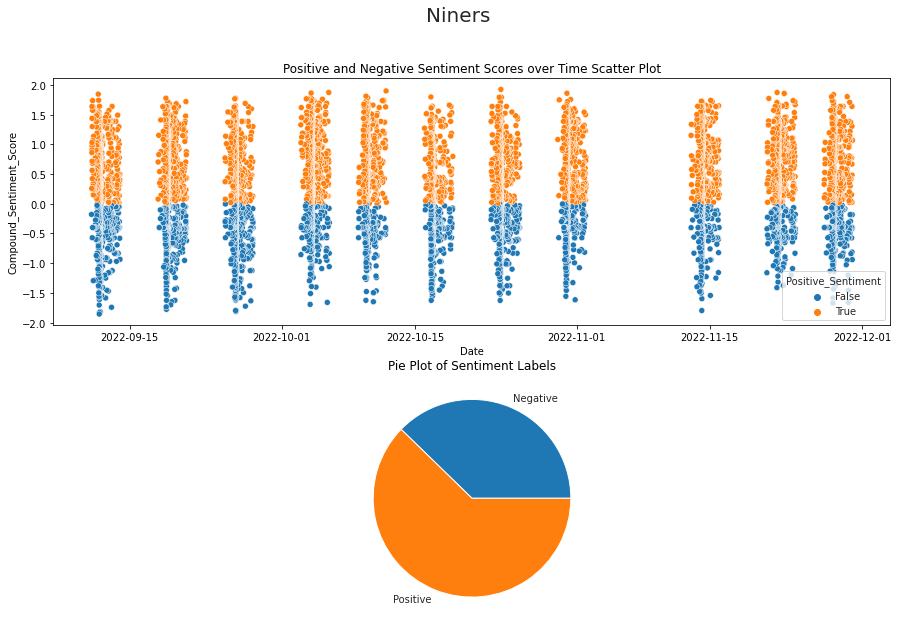

In [23]:
make_scatter_and_pie_figure(mega_niners_df,"Niners")

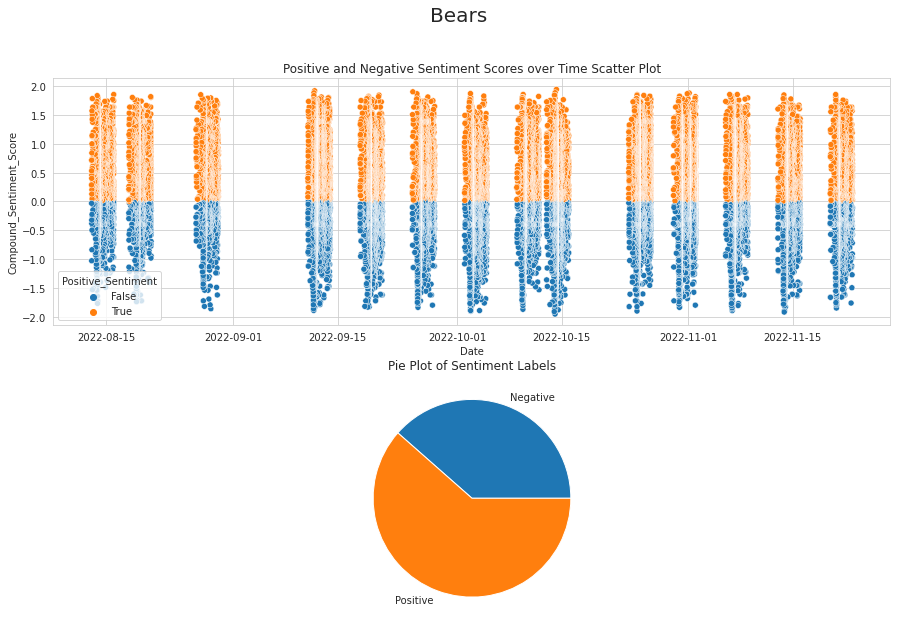

In [24]:
make_scatter_and_pie_figure(mega_bears_df,"Bears")

### Remove users that concentrate data and dont represent fan base

In [25]:
def drop_users_that_post_most(df):
    users = df.groupby(['User']).size().sort_values(ascending=False).head(5)
    list_users = list(users.index.values)
    indxs = df[df['User'].isin(list_users)].index
    df.drop(indxs, inplace=True)

In [26]:
for df in list_niners_dfs:
    drop_users_that_post_most(df)
for df in list_bears_dfs:
    drop_users_that_post_most(df)

In [27]:
mega_niners_df = pd.concat(list_niners_dfs)
mega_bears_df = pd.concat(list_bears_dfs)

In [28]:
mega_niners_df.groupby(['User']).size().sort_values(ascending=False).head(10)

User
madesense84        39
49ersSportsTalk    33
Metri84_Niners     32
FraserKnowsBest    29
TheRealMcKoy85     29
Rod_cali247        29
PARISIANinUSA      28
Lott777            28
akaDafni           27
SFNinerNoise       24
dtype: int64

In [29]:
mega_bears_df.groupby(['User']).size().sort_values(ascending=False).head(10)

User
670TheScore        389
JordanTSilveira    360
BearsNationCHI     338
Zack_Pearson       336
Jake_B30           315
AaronLemingNFL     309
classwarrior51     304
clayharbs82        286
bears_insider      285
sean_hammond       270
dtype: int64

In [30]:
mega_niners_df.describe()

,Unnamed: 0,ID,Likes,Retweets,NLTK_Sentiment_Analysis,TextBlob_Sentiment_Analysis,Compound_Sentiment_Score
count,6420.000000,6.420000e+03,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000
mean,705.686604,1.581642e+18,6.731931,0.732243,0.188169,0.106733,0.294902
std,399.900532,8.925733e+15,70.301332,7.467713,0.486944,0.361873,0.752313
min,0.000000,1.568761e+18,0.000000,0.000000,-0.967800,-1.000000,-1.855500
25%,393.000000,1.574223e+18,0.000000,0.000000,-0.153100,-0.066667,-0.296000
50%,658.000000,1.579850e+18,0.000000,0.000000,0.296000,0.050000,0.336467
75%,984.250000,1.587232e+18,2.000000,0.000000,0.598650,0.333333,0.900739
max,1864.000000,1.597738e+18,4379.000000,251.000000,0.981300,1.000000,1.923100


In [31]:
mega_bears_df.describe()

,Unnamed: 0,ID,Likes,Retweets,NLTK_Sentiment_Analysis,TextBlob_Sentiment_Analysis,Compound_Sentiment_Score
count,56124.000000,5.612400e+04,56124.000000,56124.000000,56124.000000,56124.000000,56124.000000
mean,3725.546736,1.579140e+18,25.418342,2.221492,0.143285,0.074738,0.218023
std,2406.311346,9.534719e+15,217.941805,26.670664,0.482405,0.340300,0.729032
min,0.000000,1.558243e+18,0.000000,0.000000,-0.981000,-1.000000,-1.956500
25%,1747.000000,1.571692e+18,0.000000,0.000000,-0.250000,-0.083333,-0.317609
50%,3381.500000,1.579680e+18,1.000000,0.000000,0.202300,0.016667,0.250000
75%,5509.000000,1.586809e+18,4.000000,0.000000,0.557400,0.260000,0.785900
max,9954.000000,1.595203e+18,20609.000000,3810.000000,0.998600,1.000000,1.943200


### community detection with Networkx

In [32]:
import networkx as nx #https://medium.com/swlh/a-tutorial-on-networkx-network-analysis-in-python-part-i-43c1d35830b6

In [33]:
from pyvis.network import Network

ModuleNotFoundError: No module named 'pyvis'

In [ ]:
def get_mentioned_users(s):
    final_list = []
    l = s.split('username=')
    l.pop(0)
    for i in l:
        l2 = i.split(',')
        m = l2.pop(0).strip("'")
        final_list.append(m)
    return final_list

In [ ]:
niners_community_nodes = set(mega_niners_df['User'].unique())

In [ ]:
niners_community_edges = set()
mentions = mega_niners_df[~mega_niners_df['MentionUsers'].isnull()]
for index, row in mentions.iterrows():
    user = row['User']
    other = get_mentioned_users(row['MentionUsers'])
    for i in other:
        niners_community_edges.add((user,i))

In [ ]:
len(niners_community_edges)

In [ ]:
G_niners = nx.Graph()
G_niners.add_nodes_from(niners_community_nodes)
G_niners.add_edges_from(niners_community_edges)

In [ ]:
G_niners.size()

In [ ]:
fig = plt.figure(figsize = (30,30))
nx.draw(G_niners, with_labels=False)
plt.savefig("niners_graph.png") 

In [ ]:
bears_community_nodes = set(mega_bears_df['User'].unique())

In [ ]:
bears_community_edges = set()
mentions = mega_bears_df[~mega_bears_df['MentionUsers'].isnull()]
for index, row in mentions.iterrows():
    user = row['User']
    other = get_mentioned_users(row['MentionUsers'])
    for i in other:
        bears_community_edges.add((user,i))

In [ ]:
len(bears_community_edges)

In [ ]:
G_bears = nx.Graph()
G_bears.add_nodes_from(bears_community_nodes)
G_bears.add_edges_from(bears_community_edges)

In [ ]:
G_bears.size()

In [ ]:
fig = plt.figure(figsize = (30,30))
nx.draw(G_bears, with_labels=True)
plt.savefig("bears_graph.png")

# Visual EDA

In [34]:
n_game_1 = list_niners_dfs[0]

NameError: name 'list_broncos_dfs' is not defined

In [ ]:
n_game_1.head()

In [ ]:
def make_scatter_and_pie_figure(df,fig_name,save=False):
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    sns.set_style('whitegrid')
    sns.scatterplot(ax=axes[0],x=df['Date'],y=df["Compound_Sentiment_Score"],hue=df['Positive_Sentiment'])
    axes[0].set_title('Positive and Negative Sentiment Scores over Time Scatter Plot',fontsize=12)
    true = len(df.loc[(df['Positive_Sentiment']==True)])
    false = len(df.loc[(df['Positive_Sentiment']==False)])
    axes[1].pie([false,true],labels=["Negative",'Positive'])
    axes[1].set_title('Pie Plot of Sentiment Labels',fontsize=12)
    fig.suptitle(fig_name, fontsize=20)
    if save:
        plt.savefig(fig_name)

In [ ]:
make_scatter_and_pie_figure(n_game_1,"test")

In [ ]:
df_range = n_game_1.loc[n_game_1["Date"].between("2022-08-13 12:00:00", "2022-08-14 12:00:00")]
df_range

In [ ]:
make_scatter_and_pie_figure(df_range,"test2")

In [ ]:
mega_niners_df.info()

In [ ]:
df_jimmy = mega_niners_df.loc[(mega_niners_df['clean_Tweet'].str.contains("garoppolo")) | (mega_niners_df['clean_Tweet'].str.contains("jimmy")) | (mega_niners_df['clean_Tweet'].str.contains("jimmy g"))]
df_jimmy
df_jimmy.info()

In [ ]:
users = df_jimmy.groupby(['User']).size().sort_values(ascending=False).head(5)
l = list(users.index.values) 
df_jimmy = remove_users_from_df(df_jimmy,l)
df_jimmy.info()

In [ ]:
make_scatter_and_pie_figure(df_jimmy,"test3")

## Text vectorization with sklearn

In [35]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
dataset = mega_niners_df['clean_Tweet']

In [37]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(dataset)
df_vect = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df_vect = df_vect.sort_values('TF-IDF', ascending=False)
df_vect.head(25)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,TF-IDF
lt,0.519482
gt,0.498587
frames,0.274188
pillows,0.274188
cases,0.274188
puzzles,0.274188
shop,0.266283
phone,0.257788
throw,0.208499
points,0.000000


In [38]:
dataset = mega_niners_df['clean_Tweet']

In [39]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(dataset)
df_vect = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df_vect = df_vect.sort_values('TF-IDF', ascending=False)
df_vect.head(25)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,TF-IDF
lt,0.519482
gt,0.498587
frames,0.274188
pillows,0.274188
cases,0.274188
puzzles,0.274188
shop,0.266283
phone,0.257788
throw,0.208499
points,0.000000


  ### Frequent item sets with tweets      

In [40]:
#http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder

ModuleNotFoundError: No module named 'mlxtend'

In [41]:
niners_bags_of_words = []
for index, row in mega_niners_df['clean_Tweet'].iteritems(): 
    bag = row.split(' ')
    niners_bags_of_words.append(bag)

In [42]:
te_niners = TransactionEncoder()
te_ary_niners = te_niners.fit(niners_bags_of_words).transform(niners_bags_of_words)
df_niners = pd.DataFrame(te_ary_niners, columns=te_niners.columns_)

NameError: name 'TransactionEncoder' is not defined

In [43]:
df_niners.head()

NameError: name 'df_niners' is not defined

In [44]:
niners_fp_res = apriori(df_niners, min_support=0.02, use_colnames=True)

NameError: name 'apriori' is not defined

In [45]:
n_2_item_sets = niners_fp_res.loc[(niners_fp_res['itemsets'].str.len() >= 2)]

NameError: name 'niners_fp_res' is not defined

In [46]:
n_2_item_sets

NameError: name 'n_2_item_sets' is not defined

In [47]:
bears_bags_of_words = []
for index, row in mega_bears_df['clean_Tweet'].iteritems():
    bag = row.split(' ')
    bears_bags_of_words.append(bag)   

In [48]:
te_bears = TransactionEncoder()
te_ary_bears = te_bears.fit(bears_bags_of_words).transform(bears_bags_of_words)
df_bears = pd.DataFrame(te_ary_bears, columns=te_bears.columns_)

NameError: name 'TransactionEncoder' is not defined

In [49]:
bears_fp_res = apriori(df_bears , min_support=0.02,use_colnames=True)

NameError: name 'apriori' is not defined

In [50]:
b_2_item_sets = bears_fp_res.loc[(bears_fp_res['itemsets'].str.len() >= 2)]

NameError: name 'bears_fp_res' is not defined

In [51]:
b_2_item_sets

NameError: name 'b_2_item_sets' is not defined